# Predicting Popularity 

## Business Understanding 

I have been hired by Apple Music to help improve their recommendation system and keep users engaged on their streaming service. Spotify, a competitor streaming service, has the best experience for the user when it comes to recommending songs and making playlists. 

Spotify leads the streaming platforms with over 400 million users and over 150 million premium subscirbers. Apple Music is at 88 million subscribers. With an improved recommendation system, I believe Apple Music can start to close the gap with Spotify.

The best first step in creating my content based recommendation system is to find an easy target to predict on. The easiest target in this dataframe is track_popularity because it is numerical, it is calculated by Spotify, and it helps get passed the cold start problem where a user has no prior data collected on the songs they listen to. 

In [70]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import surprise
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [72]:
df = pd.read_csv('../data/final_df.csv', index_col=0)

In [73]:
df

,track_id,track_name,track_popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,artist_id,followers,genres,artist_name,artist_popularity
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,1922-02-22,0.645,0.44500,0,-13.338,...,0.744000,0.1510,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
1,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,1922-02-22,0.298,0.46000,1,-18.645,...,0.856000,0.4360,0.402,87.921,4,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
2,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,1922-02-22,0.634,0.00399,5,-29.973,...,0.919000,0.1050,0.396,79.895,4,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
3,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,1922-02-22,0.657,0.32500,10,-14.319,...,0.856000,0.0931,0.105,81.944,5,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
4,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,1922-02-22,0.644,0.68400,7,-8.247,...,0.802000,0.0847,0.138,100.031,4,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470033,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,2020-02-25,0.528,0.67300,4,-3.639,...,0.000000,0.0989,0.297,130.066,4,5VGgFE9nPgMfEnYiPT5J2B,929.0,chinese viral pop,芝麻,36
470034,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,2020-10-30,0.609,0.01720,8,-28.573,...,0.973000,0.1080,0.890,68.619,4,7vgGpuiXdNlCmc994PlMlz,23.0,instrumental lullaby,Laureen Conrad,52
470035,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,2020-03-20,0.562,0.03310,1,-25.551,...,0.961000,0.1110,0.386,63.696,3,4MxqhahGRT4BPz1PilXGeu,91.0,instrumental lullaby,Gregory Oberle,55
470036,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,2020-09-26,0.560,0.51800,0,-7.471,...,0.000000,0.0648,0.211,131.896,4,1QLBXKM5GCpyQQSVMNZqrZ,896.0,chinese viral pop,阿YueYue,38


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470038 entries, 0 to 470037
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   track_id           470038 non-null  object 
 1   track_name         470038 non-null  object 
 2   track_popularity   470038 non-null  int64  
 3   duration_ms        470038 non-null  int64  
 4   explicit           470038 non-null  int64  
 5   release_date       470038 non-null  object 
 6   danceability       470038 non-null  float64
 7   energy             470038 non-null  float64
 8   key                470038 non-null  int64  
 9   loudness           470038 non-null  float64
 10  mode               470038 non-null  int64  
 11  speechiness        470038 non-null  float64
 12  acousticness       470038 non-null  float64
 13  instrumentalness   470038 non-null  float64
 14  liveness           470038 non-null  float64
 15  valence            470038 non-null  float64
 16  te

In [31]:
x_cols = ['danceability', 'energy', 'loudness', 'key', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']

Separating my columns into X and y so that I can run a train_test_split for the models I will use to predict track popularity.

In [32]:
X = df[x_cols]

I set my target variable to be popular songs that are ranked 30 or higher because those tracks make up around 45% of my data frame.

In [33]:
len(df[df['track_popularity'] > 30]) / len(df)

0.45150817593471165

In [34]:
y = df['track_popularity'] >= 30

In [51]:
y_train.value_counts(normalize=True)

False    0.529866
True     0.470134
Name: track_popularity, dtype: float64

The following code is from lesson 5.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [36]:
scaler=StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
num_transformer = StandardScaler()

In [38]:
preprocessor = ColumnTransformer([
    ('nums', num_transformer, x_cols)
])

## Modeling Phase 

Before I run my models and plot my confusion matrices, I want to establish what a true positive, true negative, false positive, and false negative are in this business understanding. 

True positive: My model correctly predicts a song is popular. 

True negative: My model correctly predicts a song is not popular. 

False positive: My model predicts a song is popular when it is not. 

False negative: My model predicts a song is not popular when it is. 

### Decision Tree

The following code is from lesson 17. 

In [39]:
clf_dt = Pipeline(steps = [
    ('preprocessor', preprocessor), 
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=15))
])

clf_dt.fit(X_train[x_cols], y_train)

train_preds = clf_dt.predict(X_train[x_cols])
test_preds = clf_dt.predict(X_test[x_cols])

train_probas = clf_dt.predict_proba(X_train[x_cols])[:,1]
test_probas = clf_dt.predict_proba(X_test[x_cols])[:,1]

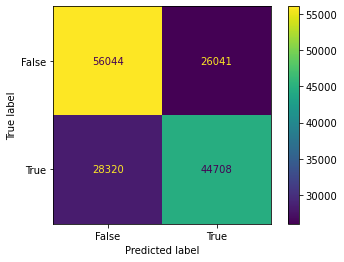

In [40]:
plot_confusion_matrix(clf_dt, X_test[x_cols], y_test)

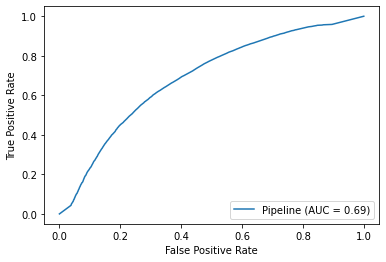

In [41]:
plot_roc_curve(clf_dt, X_test[x_cols], y_test)

In [42]:
print(f"Train F1: {f1_score(y_train, train_preds):.4f}")
print(f"Train Precision: {precision_score(y_train, train_preds):.4f}")
print(f"Train ROC-AUC: {roc_auc_score(y_train, train_preds):.4f}")
print(f"Test F1: {f1_score(y_test, test_preds):.4f}")
print(f"Test Precision: {precision_score(y_test, test_preds):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, test_preds):.4f}")

Train F1: 0.7180
Train Precision: 0.7301
Train ROC-AUC: 0.7373
Test F1: 0.6219
Test Precision: 0.6319
Test ROC-AUC: 0.6475


### Logistic Regression

The following code is from lesson 17. 

In [43]:
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('logreg', LogisticRegression())
])

clf_lr.fit(X_train[x_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nums', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'key', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('logreg', LogisticRegression())])

In [44]:
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = model.predict(Xtr)
    test_preds = model.predict(Xte)

    train_probas = model.predict_proba(Xtr)[:,1]
    test_probas = model.predict_proba(Xte)[:,1]
    
    plot_confusion_matrix(model, Xte, yte)
    
    plot_roc_curve(model, Xte, yte)
    
    print(f"Train F1: {f1_score(ytr, train_preds):.4f}")
    print(f"Train Precision: {precision_score(ytr, train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(ytr, train_preds):.4f}")
    print(f"Test F1: {f1_score(yte, test_preds):.4f}")
    print(f"Test Precision: {precision_score(yte, test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(yte, test_preds):.4f}")

Train F1: 0.6288
Train Precision: 0.6347
Train ROC-AUC: 0.6525
Test F1: 0.6302
Test Precision: 0.6366
Test ROC-AUC: 0.6535


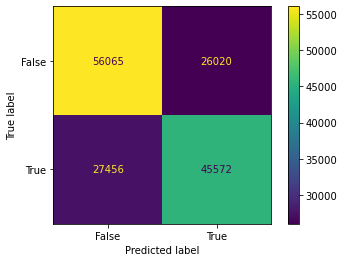

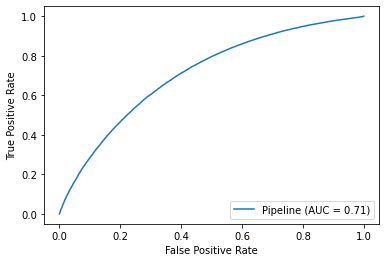

In [45]:
evaluate(clf_lr, X_train[x_cols], X_test[x_cols], y_train, y_test)

### KNN Model

The following code is from lesson 12. 

In [64]:
clf_knn = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('KNN', KNeighborsClassifier(n_neighbors=5))
])

clf_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nums', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'key', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('KNN', KNeighborsClassifier())])

In [65]:
print(f"Train Accuracy: {clf_knn.score(X_train, y_train)}")
print(f"Test Accuracy: {clf_knn.score(X_test, y_test)}")

Train Accuracy: 0.7573104707470033
Test Accuracy: 0.634021648733504


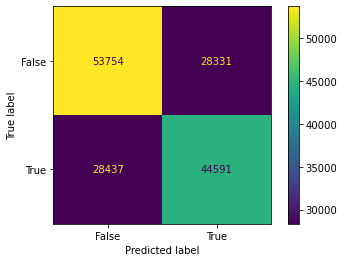

In [66]:
plot_confusion_matrix(clf_knn, X_test, y_test)

Train F1: 0.7414
Train Precision: 0.7428
Train ROC-AUC: 0.7563
Test F1: 0.6110
Test Precision: 0.6115
Test ROC-AUC: 0.6327


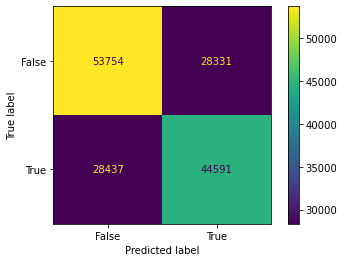

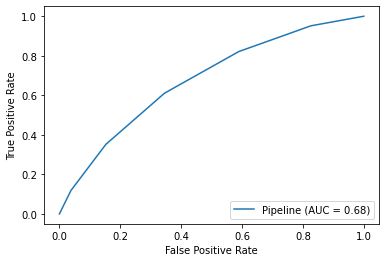

In [68]:
evaluate(clf_knn, X_train, X_test, y_train, y_test)

With KNN being my best model in terms of train and test accuracy, I am going to continue to improve the KNN going forward in this project. My main focus will be to minimize the number of false positives in my KNN confusion matrix. 

## Tuning the KNN Model